In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/Open-Science-Team-5/main/COMPARISONS%20OF%20STUDENT%20ENGAGEMENT%20IN%20UNIVERSITY%20CLUBS%20THROUGHOUT%20COVID-19%20PANDEMIC%20PERIOD%20(Responses)%20-%20Form%20Responses%201.csv")

In [3]:
data

,Timestamp,What is your year of study?,"What is the name, track or subject of your current studies?",What is your age?,Are you currently a member of any CRI clubs (academic year 2021/2022)?,If yes which one(s)?,Were you a member of any CRI Club last year (academic year 2020/2021)?,"If yes, which one(s)?",Were you a member of any CRI Club two years ago (academic year 2019/2020)?,If yes which one(s)?.1,Are you currently limiting social interactions because of COVID-19,Considering the sanitary situation: How safe do you feel when participating in clubs in person? [2021/2022],Considering the sanitary situation: How safe do you feel when participating in clubs in person? [2020/2021],Considering the sanitary situation: How safe do you feel when participating in clubs in person? [2019/2020],How much has the pandemic situation affected your club participation? [2021/2022],How much has the pandemic situation affected your club participation? [2020/2021],How much has the pandemic situation affected your club participation? [2019/2020],Do you wish you could participate more in clubs?,"If yes, is it because you feel that it is not safe to do so considering the ongoing pandemic?",How much time do you spend on club activities on average every month? [2021/2022],How much time do you spend on club activities on average every month? [2020/2021],How much time do you spend on club activities on average every month? [2019/2020],How much effort do you feel you put into CRI Clubs on a scale of 1-10? [2021/2022],How much effort do you feel you put into CRI Clubs on a scale of 1-10? [2020/2021],How much effort do you feel you put into CRI Clubs on a scale of 1-10? [2019/2020],Do you spend time with the other club members outside of CRI? [2021-2022],Do you spend time with the other club members outside of CRI? [2020-2021],Do you spend time with the other club members outside of CRI? [2019-2020],"How satisfied are you after attending a CRI club meeting on a scale of 1-5, 1 being not at all satisfied, and 5 being very satisfied? [2021-2022]","How satisfied are you after attending a CRI club meeting on a scale of 1-5, 1 being not at all satisfied, and 5 being very satisfied? [2020-2021]","How satisfied are you after attending a CRI club meeting on a scale of 1-5, 1 being not at all satisfied, and 5 being very satisfied? [2019-2020]","How much do you agree with the following statement on a scale of 1-6: Since joining a club at CRI, I feel more involved with the CRI student community. 1 represents completely disagree, and 6 represents completely agree. [2021-2022]","How much do you agree with the following statement on a scale of 1-6: Since joining a club at CRI, I feel more involved with the CRI student community. 1 represents completely disagree, and 6 represents completely agree. [2020-2021]","How much do you agree with the following statement on a scale of 1-6: Since joining a club at CRI, I feel more involved with the CRI student community. 1 represents completely disagree, and 6 represents completely agree. [2019-2020]",How has the COVID pandemic had an effect on your participation in clubs? Please describe if this has changed over the years.,What motivates you to participate in CRI Clubs?,What parts about the clubs are satisfying/dissatisfying?,In what ways has being part of a club affected your sense of belonging to the CRI?
0,11/25/2021 17:49:07,M1,Life Sciences,25.0,Yes,Wellness Club,No,NaN,No,NaN,No,Quite safe,NaN,NaN,Not At All,NaN,NaN,Yes,No,1-2 hours,I don't know,I don't know,Low,NaN,NaN,Sometimes,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,"I arrived to CRI about 2 months ago. So far, t...",I am motivated to participate in clubs who foc...,I enjoy making social connections during and o...,"This is my first time traveling to, visiting, ..."
1,11/27/2021 10:17:34,M1,Life Science,24.0,Yes,Sustainable System Club,No,I was not in CRI,No,I was not in CRI,A little,Quite safe,Not safe,Very safe,Not At All,A lot,Not At All,Yes,No,1-2 hours,I don't know,I don't k

In [4]:
data.shape

(34, 38)

In [5]:
data.columns

Index(['Timestamp', 'What is your year of study?',
       'What is the name, track or subject of your current studies?',
       'What is your age?',
       'Are you currently a member of any CRI clubs (academic year 2021/2022)? ',
       'If yes which one(s)?',
       'Were you a member of any CRI Club last year (academic year 2020/2021)?',
       'If yes, which one(s)?',
       'Were you a member of any CRI Club two years ago (academic year 2019/2020)?',
       'If yes which one(s)?.1',
       'Are you currently limiting social interactions because of COVID-19',
       'Considering the sanitary situation: How safe do you feel when participating in clubs in person?  [2021/2022]',
       'Considering the sanitary situation: How safe do you feel when participating in clubs in person?  [2020/2021]',
       'Considering the sanitary situation: How safe do you feel when participating in clubs in person?  [2019/2020]',
       'How much has the pandemic situation affected your club participat

In [6]:
data.isna().sum()

Timestamp                                                                                                                                                                                                                                    0
What is your year of study?                                                                                                                                                                                                                  0
What is the name, track or subject of your current studies?                                                                                                                                                                                  0
What is your age?                                                                                                                                                                                                                            1
Are you currently a member of any CRI clubs 

In [7]:
 column_names = {'Timestamp': 'Timestamp', 
              'What is your year of study?' : 'Year',
              'What is the name, track or subject of your current studies?': 'Track',
              'What is your age?' :'Age',
              'Are you currently a member of any CRI clubs (academic year 2021/2022)? ' : 'Membership - 2021/2022',
              'If yes which one(s)?': 'Clubs 2021/2022',
              'Were you a member of any CRI Club last year (academic year 2020/2021)?': 'Membership- 2020/2021',
              'If yes, which one(s)?': 'Clubs 2020/2021',
              'Were you a member of any CRI Club two years ago (academic year 2019/2020)?' : 'Membership - two years ago',
              'If yes which one(s)?.1': 'Clubs',
              'Are you currently limiting social interactions because of COVID-19' : 'limiting social interaction',
              'Considering the sanitary situation: How safe do you feel when participating in clubs in person?  [2021/2022]': 'sense of safety 21/22',
              'Considering the sanitary situation: How safe do you feel when participating in clubs in person?  [2020/2021]': 'sense of safety 20/21',
              'Considering the sanitary situation: How safe do you feel when participating in clubs in person?  [2019/2020]': 'sense of safety 19/20',
              'How much has the pandemic situation affected your club participation? [2021/2022]':'covid affect on CP 21/22',
              'How much has the pandemic situation affected your club participation? [2020/2021]':'covid affect on CP 20/21',
              'How much has the pandemic situation affected your club participation? [2019/2020]':'covid affect on CP 19/20',
              'Do you wish you could participate more in clubs?': 'wish to participate more',
              #'If yes, is it because you feel that it is not safe to do so considering the ongoing pandemic?',
              'How much time do you spend on club activities on average every month? [2021/2022]': 'Time spent on CA 21/22',
              'How much time do you spend on club activities on average every month? [2020/2021]':'Time spent on CA 20/21',
              'How much time do you spend on club activities on average every month? [2019/2020]':'Time spent on CA 19/20',
              'How much effort do you feel you put into CRI Clubs on a scale of 1-10? [2021/2022]': 'Effort 21/22',
              'How much effort do you feel you put into CRI Clubs on a scale of 1-10? [2020/2021]': 'Effort 20/21',
              'How much effort do you feel you put into CRI Clubs on a scale of 1-10? [2019/2020]': 'Effort 19/20',
              'Do you spend time with the other club members outside of CRI?  [2021-2022]': 'spend time outside CRI 21/22',
              'Do you spend time with the other club members outside of CRI?  [2020-2021]': 'spend time outside CRI 20/21',
              'Do you spend time with the other club members outside of CRI?  [2019-2020]': 'spend time outside CRI 19/20',
              'How satisfied are you after attending a CRI club meeting on a scale of 1-5, 1 being not at all satisfied, and 5 being very satisfied? [2021-2022]' : 'scale of satisfaction 21/22',
              'How satisfied are you after attending a CRI club meeting on a scale of 1-5, 1 being not at all satisfied, and 5 being very satisfied? [2020-2021]': 'scale of satisfaction 20/21',
              'How satisfied are you after attending a CRI club meeting on a scale of 1-5, 1 being not at all satisfied, and 5 being very satisfied? [2019-2020]': 'scale of satisfaction 19/20',
              'How much do you agree with the following statement on a scale of 1-6: Since joining a club at CRI, I feel more involved with the CRI student community. 1 represents completely disagree, and 6 represents completely agree. [2021-2022]': 'Rate: Since joining a club at CRI, I feel more involved with the CRI student community 21/22',
              'How much do you agree with the following statement on a scale of 1-6: Since joining a club at CRI, I feel more involved with the CRI student community. 1 represents completely disagree, and 6 represents completely agree. [2020-2021]':'Rate : Since joining a club at CRI, I feel more involved with the CRI student community 20/21',
              'How much do you agree with the following statement on a scale of 1-6: Since joining a club at CRI, I feel more involved with the CRI student community. 1 represents completely disagree, and 6 represents completely agree. [2019-2020]':'Rate : Since joining a club at CRI, I feel more involved with the CRI student community 19/20',
              'How has the COVID pandemic had an effect on your participation in clubs? Please describe if this has changed over the years.': ' covid effect on club participation',
              'What motivates you to participate in CRI Clubs?': 'Motivation to participate'
              #'What parts about the clubs are satisfying/dissatisfying?',
              #'In what ways has being part of a club affected your sense of belonging to the CRI?'
              }
data.rename(columns=column_names, inplace=True)

In [8]:
data.drop('Timestamp', axis=1, inplace=True)

In [9]:
data.sort_values("Year", axis = 0, ascending = True,
                 inplace = True, na_position ='last')

In [10]:
data.head()

,Year,Track,Age,Membership - 2021/2022,Clubs 2021/2022,Membership- 2020/2021,Clubs 2020/2021,Membership - two years ago,Clubs,limiting social interaction,sense of safety 21/22,sense of safety 20/21,sense of safety 19/20,covid affect on CP 21/22,covid affect on CP 20/21,covid affect on CP 19/20,wish to participate more,"If yes, is it because you feel that it is not safe to do so considering the ongoing pandemic?",Time spent on CA 21/22,Time spent on CA 20/21,Time spent on CA 19/20,Effort 21/22,Effort 20/21,Effort 19/20,spend time outside CRI 21/22,spend time outside CRI 20/21,spend time outside CRI 19/20,scale of satisfaction 21/22,scale of satisfaction 20/21,scale of satisfaction 19/20,"Rate: Since joining a club at CRI, I feel more involved with the CRI student community 21/22","Rate : Since joining a club at CRI, I feel more involved with the CRI student community 20/21","Rate : Since joining a club at CRI, I feel more involved with the CRI student community 19/20",covid effect on club participation,Motivation to participate,What parts about the clubs are satisfying/dissatisfying?,In what ways has being part of a club affected your sense of belonging to the CRI?
2,L1,Fdv/biology,18.0,No,NaN,No,NaN,No,NaN,No,Quite safe,Quite safe,Not safe,Not At All,A Little,Quite a lot,Yes,No,2-4 hours,2-4 hours,2-4 hours,Very low,Very low,Very low,Sometimes,Never,Never,3.0,NaN,NaN,3.0,1.0,1.0,"It doesn't change a lot, I basically don't par...","Meeting new people, new cultures",NaN,NaN
11,L1,science of life,19.0,Yes,upcycling/ theater / Beer,No,NaN,No,NaN,No,Quite safe,Not safe,Not safe,NaN,NaN,A lot,Yes,No,2-4 hours,0 hour,> 4 hours,NaN,NaN,NaN,Very Often,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
8,L1,Frontiere du Vivant,18.0,Yes,Cri du Coeur and Upcycling,No,NaN,No,NaN,No,Very safe,NaN,NaN,A Little,NaN,NaN,Yes,No,1-2 hours,0 hour,0 hour,Very low,NaN,NaN,Sometimes,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,"Not really, I just didn't have the time to att...",Doing creative things other than studying as w...,Maybe the organization could be better. As an ...,I love the fact that there are no barriers bet...
33,L2,Frontières du Vivant,20.0,Yes,Cri du Coeur,No,NaN,No,NaN,A little,Quite safe,Not safe,Not safe,A Little,Quite a lot,Quite a lot,Yes,Yes,2-4 hours,0 hour,0 hour,Medium,Medium,Medium,Sometimes,Never,Never,5.0,5.0,5.0,6.0,6.0,6.0,I did not participate in any clubs last year b...,"Meeting people, discovering new things",Satisfying: meeting people and learning things...,I felt that I belonged more to the CRI when jo...
32,L2,Licence Frontière du vivant,18.0,Yes,"CRI Music, Enigma",Yes,CRI Music,No,NaN,A little,Quite safe,Not safe,NaN,A Little,A lot,NaN,Yes,No,> 4 hours,1-2 hours,NaN,High,Low,NaN,Very Often,Sometimes,NaN,4.0,2.0,NaN,5.0,3.0,NaN,There were little to no meetings last years be...,NaN,NaN,Can connect with more people


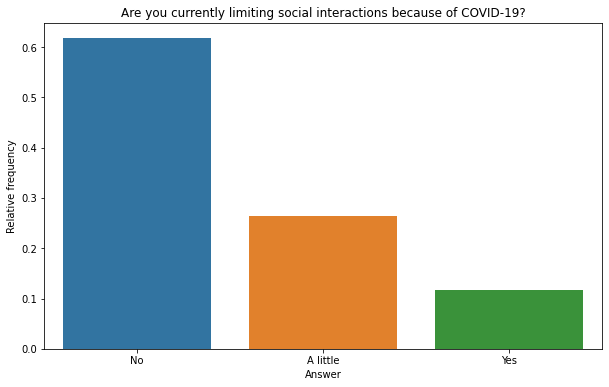

In [18]:
y = data["limiting social interaction"].value_counts()
x = ["No", "A little", "Yes"]
y = [y[0]/data.shape[0], y[1]/data.shape[0], y[2]/data.shape[0]]
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.xlabel("Answer")
plt.ylabel("Relative frequency")
plt.title("Are you currently limiting social interactions because of COVID-19?");

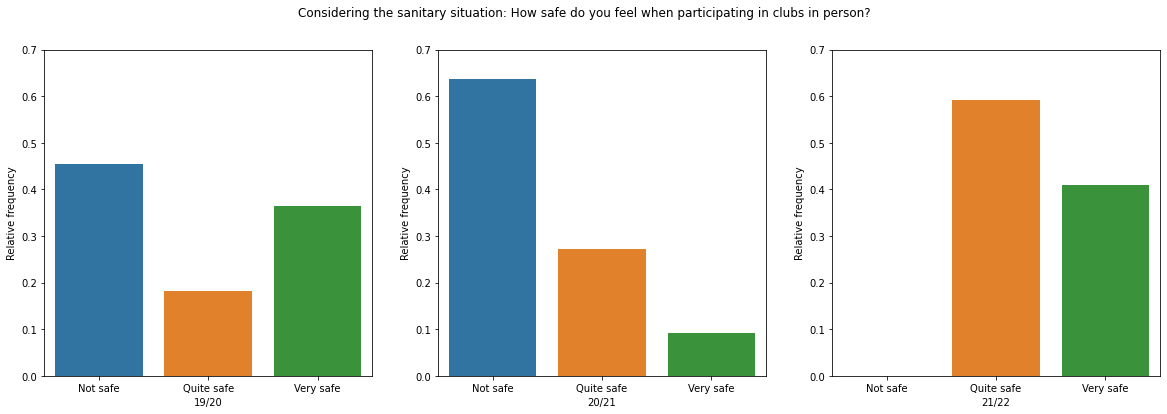

In [36]:
safety = data[["sense of safety 19/20","sense of safety 20/21","sense of safety 21/22"]]
safety = safety.dropna()

plt.figure(figsize=(20,6))

x = safety["sense of safety 19/20"].unique()
y = safety["sense of safety 19/20"].value_counts()
y = [y[0]/safety.shape[0], y[2]/safety.shape[0], y[1]/safety.shape[0]]
aux1 = pd.DataFrame([y], columns =x)
aux1["Year"] = "19/20"
plt.subplot(1,3,1)
sns.barplot(x=x, y=y, order=["Not safe", "Quite safe", "Very safe"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("19/20")
plt.ylabel("Relative frequency")

x = ["Not safe", "Quite safe", "Very safe"]
y = safety["sense of safety 20/21"].value_counts()
y = [y[0]/safety.shape[0], y[1]/safety.shape[0], y[2]/safety.shape[0]]
aux2 = pd.DataFrame([y], columns =x)
aux2["Year"] = "20/21"
plt.subplot(1,3,2)
sns.barplot(x=x, y=y, order=["Not safe", "Quite safe", "Very safe"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("20/21")
plt.ylabel("Relative frequency")

x = safety["sense of safety 21/22"].unique()
y = safety["sense of safety 21/22"].value_counts()
y = [y[0]/safety.shape[0], y[1]/safety.shape[0]]
x = list(x)
y = list(y)
x.append("Not safe")
y.append(0)
aux3 = pd.DataFrame([y], columns =x)
aux3["Year"] = "21/22"
aux3["Not safe"] = 0
aux = pd.concat([aux1, aux2, aux3])
plt.subplot(1,3,3)
sns.barplot(x=x, y=y, order=["Not safe", "Quite safe", "Very safe"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("21/22")
plt.ylabel("Relative frequency")

plt.suptitle("Considering the sanitary situation: How safe do you feel when participating in clubs in person?");

In [37]:
aux

,Not safe,Quite safe,Very safe,Year
0,0.454545,0.181818,0.363636,19/20
0,0.636364,0.272727,0.090909,20/21
0,0.000000,0.590909,0.409091,21/22


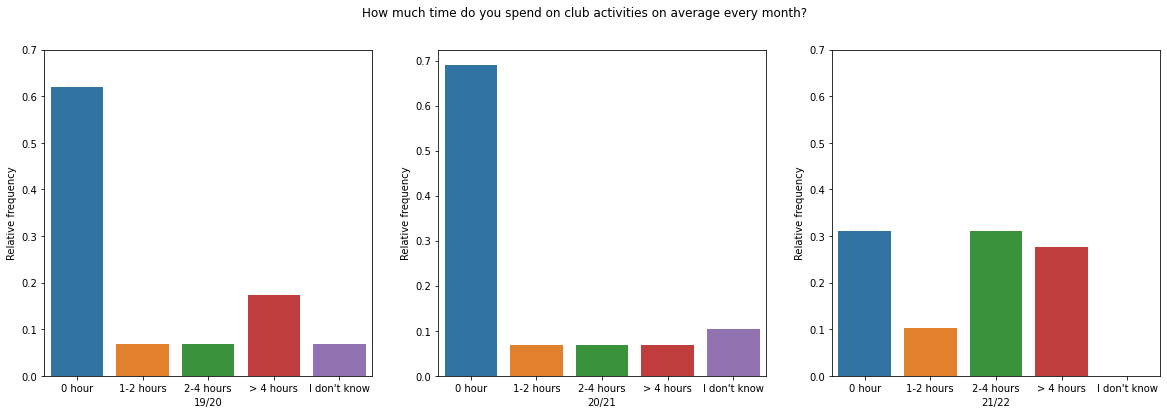

In [45]:
time_spent = data[["Time spent on CA 19/20","Time spent on CA 20/21","Time spent on CA 21/22"]]
time_spent = time_spent.dropna()

plt.figure(figsize=(20,6))

x = ["0 hour", "> 4 hours", "2-4 hours", "I don't know","1-2 hours"]
y = time_spent["Time spent on CA 19/20"].value_counts()
y = [i/time_spent.shape[0] for i in y]

plt.subplot(1,3,1)
sns.barplot(x=x, y=y, order = ["0 hour", "1-2 hours", "2-4 hours", "> 4 hours", "I don't know"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("19/20")
plt.ylabel("Relative frequency")

x = ["0 hour", "I don't know", "> 4 hours", "2-4 hours", "1-2 hours"]
y = time_spent["Time spent on CA 20/21"].value_counts()
y = [i/time_spent.shape[0] for i in y]
plt.subplot(1,3,2)
sns.barplot(x=x, y=y, order = ["0 hour", "1-2 hours", "2-4 hours", "> 4 hours", "I don't know"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("20/21")
plt.ylabel("Relative frequency")

x = ["2-4 hours", "0 hour", "> 4 hours", "1-2 hours"]
y = time_spent["Time spent on CA 21/22"].value_counts()
y = [i/time_spent.shape[0] for i in y]
x = list(x)
x.append("I don't know")
y = list(y)
y.append(0)
plt.subplot(1,3,3)
sns.barplot(x=x, y=y, order = ["0 hour", "1-2 hours", "2-4 hours", "> 4 hours", "I don't know"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("21/22")
plt.ylabel("Relative frequency")

plt.suptitle("How much time do you spend on club activities on average every month?");

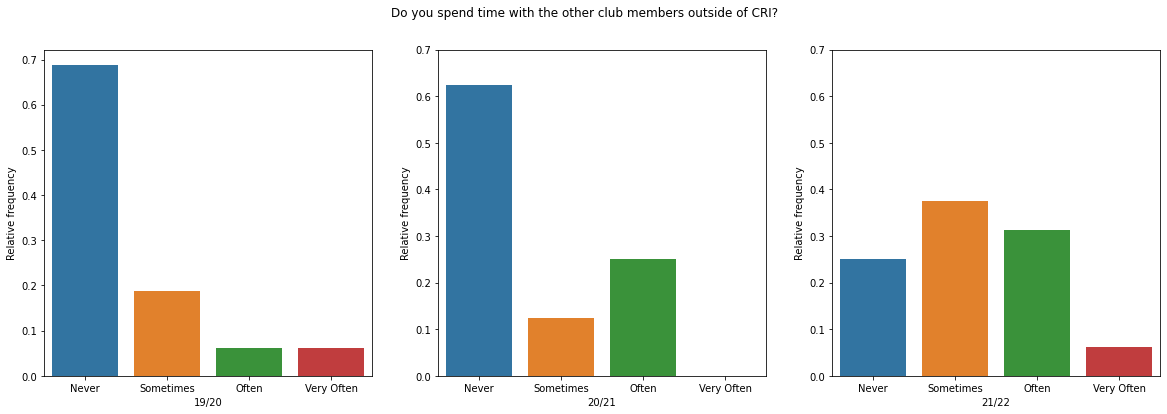

In [15]:
outside = data[["spend time outside CRI 19/20","spend time outside CRI 20/21","spend time outside CRI 21/22"]]
outside = outside.dropna()

plt.figure(figsize=(20,6))

x = outside["spend time outside CRI 19/20"].unique()
y = outside["spend time outside CRI 19/20"].value_counts()
y = [i/outside.shape[0] for i in y]

plt.subplot(1,3,1)
sns.barplot(x=x, y=y, order = ["Never", "Sometimes", "Often", "Very Often"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("19/20")
plt.ylabel("Relative frequency")

x = outside["spend time outside CRI 20/21"].unique()
y = outside["spend time outside CRI 20/21"].value_counts()
y = [i/outside.shape[0] for i in y]
x = list(x)
x.append("Very Often")
y = list(y)
y.append(0)

plt.subplot(1,3,2)
sns.barplot(x=x, y=y, order = ["Never", "Sometimes", "Often", "Very Often"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("20/21")
plt.ylabel("Relative frequency")

x = outside["spend time outside CRI 21/22"].unique()
y = outside["spend time outside CRI 21/22"].value_counts()
y = [i/outside.shape[0] for i in y]

plt.subplot(1,3,3)
sns.barplot(x=x, y=y, order = ["Never", "Sometimes", "Often", "Very Often"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("21/22")
plt.ylabel("Relative frequency")

plt.suptitle("Do you spend time with the other club members outside of CRI?");

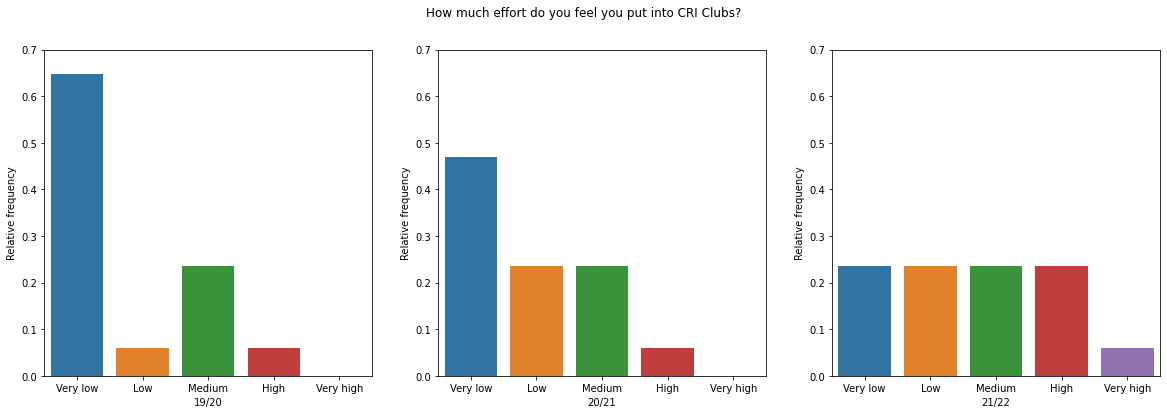

In [16]:
effort = data[["Effort 19/20","Effort 20/21","Effort 21/22"]]
effort = effort.dropna()

plt.figure(figsize=(20,6))

x = effort["Effort 19/20"].unique()
y = effort["Effort 19/20"].value_counts()
y = [i/effort.shape[0] for i in y]
x = list(x)
x.append("Very high")
y = list(y)
y.append(0)

plt.subplot(1,3,1)
sns.barplot(x=x, y=y, order = ["Very low", "Low", "Medium", "High", "Very high"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("19/20")
plt.ylabel("Relative frequency")

x = effort["Effort 20/21"].unique()
y = effort["Effort 20/21"].value_counts()
y = [i/effort.shape[0] for i in y]
x = list(x)
x.append("Very high")
y = list(y)
y.append(0)

plt.subplot(1,3,2)
sns.barplot(x=x, y=y, order = ["Very low", "Low", "Medium", "High", "Very high"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("20/21")
plt.ylabel("Relative frequency")

x = effort["Effort 21/22"].unique()
y = effort["Effort 21/22"].value_counts()
y = [i/effort.shape[0] for i in y]

plt.subplot(1,3,3)
sns.barplot(x=x, y=y, order = ["Very low", "Low", "Medium", "High", "Very high"])
plt.yticks(np.arange(0, 0.71, 0.1))
plt.xlabel("21/22")
plt.ylabel("Relative frequency")

plt.suptitle("How much effort do you feel you put into CRI Clubs?");

In [17]:
effort

,Effort 19/20,Effort 20/21,Effort 21/22
2,Very low,Very low,Very low
33,Medium,Medium,Medium
15,Very low,Very low,Medium
9,Very low,Low,High
28,Low,Medium,Very low
3,Medium,High,Very low
26,Very low,Medium,Very low
24,Very low,Very low,Low
22,Medium,Low,High
19,Medium,Medium,Medium
